In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
covid = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')

In [3]:
covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,07/07/2020,7,7,2020,433,56,Afghanistan,AF,AFG,38041757.0,Asia
1,06/07/2020,6,7,2020,279,38,Afghanistan,AF,AFG,38041757.0,Asia
2,05/07/2020,5,7,2020,348,7,Afghanistan,AF,AFG,38041757.0,Asia
3,04/07/2020,4,7,2020,302,12,Afghanistan,AF,AFG,38041757.0,Asia
4,03/07/2020,3,7,2020,186,33,Afghanistan,AF,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
28245,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
28246,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa
28247,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
28248,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa


In [4]:
covid.to_csv('covid_data.csv')

In [5]:
covid.drop("countryterritoryCode",axis=1,inplace=True)
covid.drop("day",axis=1,inplace=True)
covid.drop("month",axis=1,inplace=True)
covid.drop("year",axis=1,inplace=True)
covid.drop("popData2019",axis=1,inplace=True)

In [6]:
covid.drop("geoId",axis=1,inplace=True)
covid

,dateRep,cases,deaths,countriesAndTerritories,continentExp
0,07/07/2020,433,56,Afghanistan,Asia
1,06/07/2020,279,38,Afghanistan,Asia
2,05/07/2020,348,7,Afghanistan,Asia
3,04/07/2020,302,12,Afghanistan,Asia
4,03/07/2020,186,33,Afghanistan,Asia
...,...,...,...,...,...
28245,25/03/2020,0,0,Zimbabwe,Africa
28246,24/03/2020,0,1,Zimbabwe,Africa
28247,23/03/2020,0,0,Zimbabwe,Africa
28248,22/03/2020,1,0,Zimbabwe,Africa


In [7]:
covid.rename(columns={'dateRep':'date','countriesAndTerritories':'country', 'continentExp':'continent'}, inplace=True)

In [8]:
covid

,date,cases,deaths,country,continent
0,07/07/2020,433,56,Afghanistan,Asia
1,06/07/2020,279,38,Afghanistan,Asia
2,05/07/2020,348,7,Afghanistan,Asia
3,04/07/2020,302,12,Afghanistan,Asia
4,03/07/2020,186,33,Afghanistan,Asia
...,...,...,...,...,...
28245,25/03/2020,0,0,Zimbabwe,Africa
28246,24/03/2020,0,1,Zimbabwe,Africa
28247,23/03/2020,0,0,Zimbabwe,Africa
28248,22/03/2020,1,0,Zimbabwe,Africa


In [9]:
covid1 = covid.iloc[::-1]
covid1

,date,cases,deaths,country,continent
28249,21/03/2020,1,0,Zimbabwe,Africa
28248,22/03/2020,1,0,Zimbabwe,Africa
28247,23/03/2020,0,0,Zimbabwe,Africa
28246,24/03/2020,0,1,Zimbabwe,Africa
28245,25/03/2020,0,0,Zimbabwe,Africa
...,...,...,...,...,...
4,03/07/2020,186,33,Afghanistan,Asia
3,04/07/2020,302,12,Afghanistan,Asia
2,05/07/2020,348,7,Afghanistan,Asia
1,06/07/2020,279,38,Afghanistan,Asia


In [10]:
covid1.head()

,date,cases,deaths,country,continent
28249,21/03/2020,1,0,Zimbabwe,Africa
28248,22/03/2020,1,0,Zimbabwe,Africa
28247,23/03/2020,0,0,Zimbabwe,Africa
28246,24/03/2020,0,1,Zimbabwe,Africa
28245,25/03/2020,0,0,Zimbabwe,Africa


In [11]:
country_wise = covid1.groupby(["country"]).sum()
country_wise

,cases,deaths
country,,
Afghanistan,33384,920
Albania,2964,79
Algeria,16404,959
Andorra,855,52
Angola,353,19
...,...,...
Vietnam,369,0
Western_Sahara,519,1
Yemen,1290,345


In [12]:
k=country_wise.nlargest(10, ['cases']) 
k

,cases,deaths
country,,
United_States_of_America,2938625,130306
Brazil,1623284,65487
India,719665,20160
Russia,687862,10296
Peru,305703,10772
Chile,298557,6384
United_Kingdom,285768,44236
Mexico,261750,31119
Spain,251789,28388


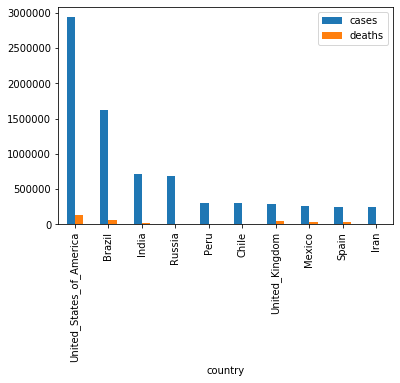

In [13]:
k.plot.bar()
plt.savefig("Top 10 countries in COVID-19 cases.png")

In [14]:
k.iloc[2]

cases     719665
deaths     20160
Name: India, dtype: int64

In [15]:
l=country_wise.nlargest(10, ['deaths'])
l

,cases,deaths
country,,
United_States_of_America,2938625,130306
Brazil,1623284,65487
United_Kingdom,285768,44236
Italy,241819,34869
Mexico,261750,31119
France,168335,29920
Spain,251789,28388
India,719665,20160
Iran,243051,11731


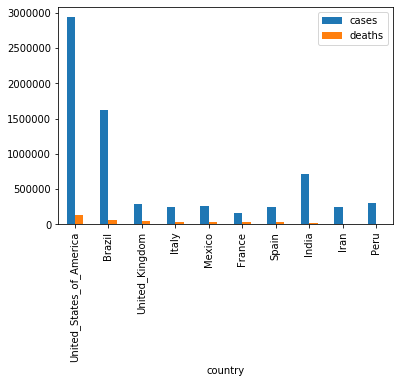

In [16]:
l.plot.bar()
plt.savefig("Top 10 countries in COVID-19 deaths.png")